# **A. Data Preprocessing**

## **1. Import Data and Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as pyplot
import statsmodels.api as sm
import statsmodels.formula.api as sm

from sklearn import svm, datasets, linear_model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, f1_score, precision_recall_fscore_support, roc_auc_score
from sklearn.svm import SVC
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, Normalizer, StandardScaler, RobustScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from collections import Counter
from numpy import where
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew, kurtosis

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
url = 'https://raw.githubusercontent.com/sabrinatiarab/Cakra_Data-Science-Challenge-Memprediksi-Kualitas-Jeruk-Berdasarkan-Dataset/main/Orange%20Quality%20Data.csv'
df = pd.read_csv(url)
df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


## **3. Data Info**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


In [4]:
df.columns

Index(['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)',
       'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)', 'Color',
       'Variety', 'Blemishes (Y/N)', 'Quality (1-5)'],
      dtype='object')

#**B. Label Encode**

In [24]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame and object_cols is a list of object column names to one-hot encode
object_cols = df.select_dtypes(include='object').columns

# Label encoding without including missing values
le = LabelEncoder()
df[object_cols] = df[object_cols].apply(lambda col: le.fit_transform(col.astype(str)), axis=0)

# One-hot encoding using get_dummies with handling missing values
df_encoded = pd.get_dummies(df, columns=object_cols, dummy_na=True, drop_first=False)  # dummy_na=True will create a separate column for NaN values

# Display the resulting DataFrame
df_encoded

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,2,22,0,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,0,13,0,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,1,3,0,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,3,1,0,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,2,6,6,4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,3,20,8,5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,1,10,0,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,0,21,5,5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,1,11,5,3.0


In [25]:
# Get the descriptive statistics
df_encoded.describe()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,1.414938,12.340249,2.846473,3.817427
std,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.245837,7.176379,3.887651,1.014410
min,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,0.000000,6.000000,0.000000,3.000000
50%,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,1.000000,13.000000,0.000000,4.000000
75%,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,3.000000,18.000000,6.000000,4.500000
max,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,4.000000,23.000000,11.000000,5.000000


<Axes: >

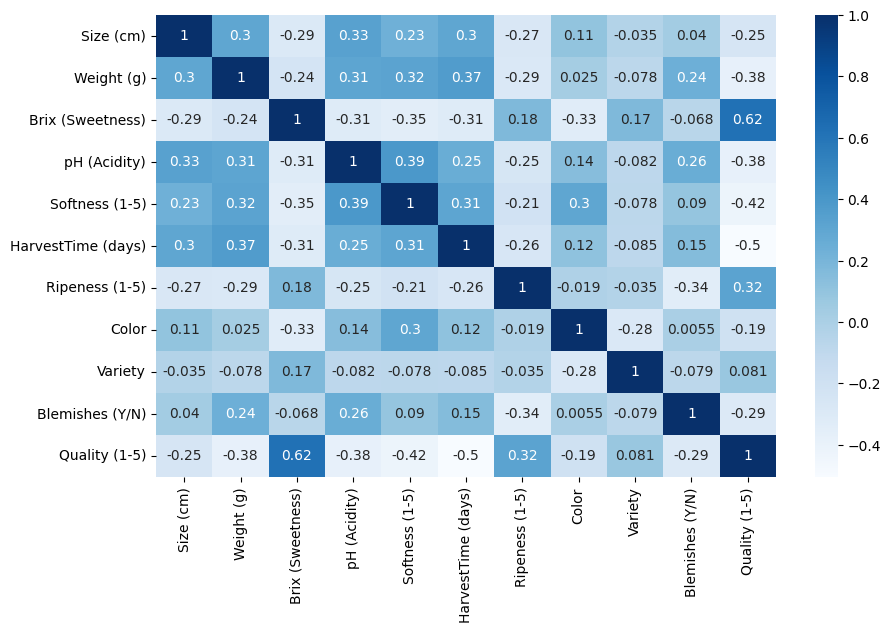

In [26]:
fig, ax = plt.subplots(figsize=(10,6)) # Sample figsize in inches, change the number accordingly
sns.heatmap(df_encoded.corr(method = 'spearman'), annot= True, cmap = 'Blues',ax = ax)

In [27]:
# Calculate missing value counts for all columns
missing_value_counts = df_encoded.isnull().sum()

# Calculate missing value percentages for all columns
missing_value_percentages = (missing_value_counts / len(df_encoded)).round(2) * 100

# Combine missing value counts and percentages into a DataFrame
missing_data_all_columns = pd.DataFrame({
    'Missing Value Count': missing_value_counts,
    'Missing Value Percentage': missing_value_percentages
})

# Display the combined DataFrame
print("Missing Data for All Columns:")
print(missing_data_all_columns)

Missing Data for All Columns:
                    Missing Value Count  Missing Value Percentage
Size (cm)                             0                       0.0
Weight (g)                            0                       0.0
Brix (Sweetness)                      0                       0.0
pH (Acidity)                          0                       0.0
Softness (1-5)                        0                       0.0
HarvestTime (days)                    0                       0.0
Ripeness (1-5)                        0                       0.0
Color                                 0                       0.0
Variety                               0                       0.0
Blemishes (Y/N)                       0                       0.0
Quality (1-5)                         0                       0.0


#**D. Feature Engineering**

In [28]:
# Feature Engineering

# It helps in increasing the accuracy of the model as by tweaking the features of the data
# the performance of the models can be improved which ultimately influences the final result.

# Normally Feature Engineering contains 3 Major Steps :
# 1.Feature Transformation
# 2.Feature Scaling
# 3.Feature Construction

##**Feature Transformation**

In [29]:
# 1. Feature Transformation
# Features are transformed by replacing the observations of the feature by a function
# Sometimes the datasets are not normally distributed and in such circumstances
# for the normal functioning of various statistical and other machine learning algorithms
# feature transformation is performed to normalize the data
# The common application of them is when dealing with predictive models
# such as Linear Regression where we need to normalize the data if the data is otherwise.
# Methods Used: 1.Log Transformation 2.Square Root 3.Cube Root and 4.Box-Cox Transformation

In [30]:
# # Skewness

# # Spreadness of the Distribution
# # If Skewness = 0, data is perfectly symmetrical / Normally Distributed
# # If Skewness is less than -1 or greater +1, distribution is highly skewed
# # If Skewness is between -1 and -0.5 or between 0.5 and 1, distribution is moderately skewed
# # If Skewness is between -0.5 and 0.5 then it is approximately symmetric

# Import necessary libraries
import pandas as pd

# Assuming data2 is your DataFrame with cleanz values
skewness = df_encoded.skew()

# Sort the skewness values in ascending order
skewness_sorted = skewness.sort_values(ascending=True)

# Display the sorted skewness values
print(skewness_sorted)

Quality (1-5)        -0.933863
Ripeness (1-5)       -0.594334
Variety              -0.128757
Softness (1-5)       -0.067155
Weight (g)           -0.048942
HarvestTime (days)   -0.040459
Brix (Sweetness)     -0.034067
Size (cm)             0.154563
Color                 0.358694
pH (Acidity)          0.379275
Blemishes (Y/N)       0.820935
dtype: float64


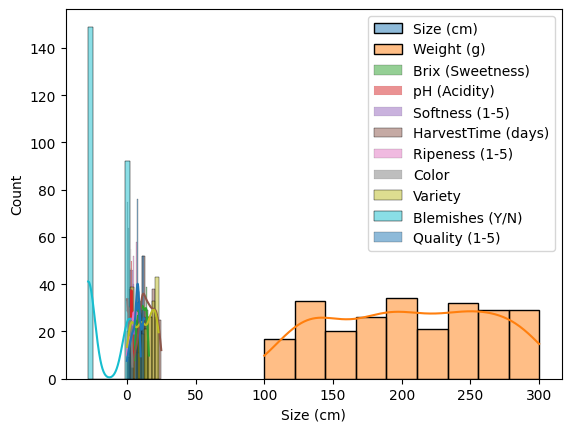

Optimal Lambda Values:
Column 'Size (cm)': Lambda = None
Column 'Weight (g)': Lambda = None
Column 'Brix (Sweetness)': Lambda = None
Column 'pH (Acidity)': Lambda = None
Column 'Softness (1-5)': Lambda = None
Column 'HarvestTime (days)': Lambda = None
Column 'Ripeness (1-5)': Lambda = 1.534807950678563
Column 'Color': Lambda = None
Column 'Variety': Lambda = None
Column 'Blemishes (Y/N)': Lambda = -0.09333473202122647
Column 'Quality (1-5)': Lambda = 2.040228827628958


In [31]:
from scipy.stats import boxcox
df_trans = df_encoded.copy()

# Define the columns to apply Box-Cox transformation
boxcox_columns = ['Quality (1-5)', 'Ripeness (1-5)', 'Blemishes (Y/N)']

# Initialize a DataFrame to store transformed data
transformed_data = pd.DataFrame()

# Initialize a list to store optimal lambda values for each column
optimal_lambdas = []

# Perform Box-Cox transformation on specified columns
for col in df_trans.columns:
    if col in boxcox_columns:
        # Perform Box-Cox transformation for the current column
        transformed_col, best_lambda = boxcox(df_trans[col] + 1e-6)  # Add a small constant to avoid zero values
        # Store the transformed column in the DataFrame
        transformed_data[col] = transformed_col
        # Store the optimal lambda value for the current column
        optimal_lambdas.append(best_lambda)
    else:
        # If the column is excluded or not in the boxcox_columns, simply copy it to the transformed DataFrame
        transformed_data[col] = df_trans[col]
        # Assign a lambda value of None for excluded columns
        optimal_lambdas.append(None)

# Plot distribution of the Box-Cox-transformed data for each column
for column in transformed_data.columns:
    sns.histplot(transformed_data[column], label=column, kde=True)
plt.legend()
plt.show()

# Display the optimal lambda values for each column
print("Optimal Lambda Values:")
for col, lam in zip(transformed_data.columns, optimal_lambdas):
    print(f"Column '{col}': Lambda = {lam}")

In [32]:
# Calculate skewness after Box-Cox transformation
skewness_after_boxcox = transformed_data.skew().round(2)
print("Skewness after Box-Cox Transformation:")
print(skewness_after_boxcox)

Skewness after Box-Cox Transformation:
Size (cm)             0.15
Weight (g)           -0.05
Brix (Sweetness)     -0.03
pH (Acidity)          0.38
Softness (1-5)       -0.07
HarvestTime (days)   -0.04
Ripeness (1-5)       -0.28
Color                 0.36
Variety              -0.13
Blemishes (Y/N)       0.49
Quality (1-5)        -0.26
dtype: float64


In [33]:
# Convert the RangeIndex to DataFrame and set column names
df_trans = pd.DataFrame(transformed_data, columns=df_encoded.columns)
df_trans

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.818519,2,22,-28.187264,7.801901
1,8.2,220,10.5,3.4,3.0,14,5.902384,0,13,-28.187264,10.054318
2,6.8,150,14.0,3.0,1.0,7,7.052711,1,3,-28.187264,12.583003
3,9.0,250,8.5,3.8,4.0,21,3.804873,3,1,-28.187264,5.824442
4,8.5,210,11.5,3.3,2.5,12,7.052711,2,6,1.649952,10.054318
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,0.000001,3,20,1.890094,12.583003
237,7.4,275,8.5,3.5,5.0,20,7.052711,1,10,-28.187264,7.801901
238,7.5,196,15.7,3.0,3.0,13,2.865965,0,21,1.494388,12.583003
239,7.2,251,9.8,4.3,3.0,23,0.000001,1,11,1.494388,4.120464


##**Feature Scaling**

In [34]:
# 2. Feature Scaling
# Feature scaling is conducted to standardize the independent features
# This is done because the range of raw data may vary widely.
# Some predictive models such as KNN and K-means consider Euclidean distance
# it is important for them to have the features on the same scale.
# Method Used: Min-Max Scaler

In [35]:
# Min Max Scaler

# MinMaxScaler method is one of the methods of standardizing
# the data where values are made to lie between 0 and 1.

# Initialization
# We begin with initializing the min_max function.

# # Columns to exclude
# columns_to_exclude = ['0','1','2','3']

# # Extract the columns to scale
# columns_to_scale = [col for col in df_trans.columns if col not in columns_to_exclude]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform selected numeric columns
df_cleanz_boxcox_minmax = scaler.fit_transform(df_trans)

# Convert the NumPy array back to a DataFrame
df_cleanz_boxcox_minmax = pd.DataFrame(df_cleanz_boxcox_minmax, columns=df_trans.columns)

# Print or use the scaled DataFrame
df_cleanz_boxcox_minmax.head()

# Inference : Range is set from 0 to 1

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,0.375,0.40,0.619048,0.2500,0.250,0.285714,0.683215,0.50,0.956522,0.000000,0.620035
1,0.550,0.60,0.476190,0.3750,0.500,0.476190,0.836896,0.00,0.565217,0.000000,0.799040
2,0.200,0.25,0.809524,0.1250,0.000,0.142857,1.000000,0.25,0.130435,0.000000,1.000000
3,0.750,0.75,0.285714,0.6250,0.750,0.809524,0.539491,0.75,0.043478,0.000000,0.462882
4,0.625,0.55,0.571429,0.3125,0.375,0.380952,1.000000,0.50,0.260870,0.983565,0.799040


###Z-Score

In [36]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

# Assuming df is your DataFrame
# Select only the numeric columns
# df_numeric = df1.select_dtypes(include=np.number)

# Calculate Z-scores for all numeric columns
z_scores = df_cleanz_boxcox_minmax.apply(zscore)

# Display the first 5 rows of Z-scores for all columns
print("First 5 rows of Z-Scores:")
print(z_scores.head())
print("\n")

# Filter out rows where any Z-score is greater than 3 (considered as outliers)
outlier_indices = np.where(np.abs(z_scores) > 3)
outlier_rows = np.unique(outlier_indices[0])

# Display rows where any Z-score is greater than 3
print("Filtering out Z-Score > 3:")
print("Row Numbers where Z-Score is greater than 3:")
print(outlier_rows)
print("\n")

# Display exact values of the columns for the identified outliers
print("Checking exact values for outliers:")
for idx in outlier_rows:
    if idx < len(df_cleanz_boxcox_minmax):
        print(df_cleanz_boxcox_minmax.iloc[idx])

# Print Z-score values of outliers
print("Z-score values of outliers:")
for idx in outlier_rows:
    if idx < len(z_scores):
        print(f"Row {idx}: {z_scores.iloc[idx]}")

First 5 rows of Z-Scores:
   Size (cm)  Weight (g)  Brix (Sweetness)  pH (Acidity)  Softness (1-5)  \
0  -0.318168   -0.445988          0.396454     -0.651937       -0.812044   
1   0.327740    0.263940         -0.148068     -0.175898       -0.054974   
2  -0.964075   -0.978434          1.122482     -1.127977       -1.569115   
3   1.065920    0.796386         -0.874096      0.776182        0.702096   
4   0.604557    0.086458          0.214947     -0.413918       -0.433509   

   HarvestTime (days)  Ripeness (1-5)     Color   Variety  Blemishes (Y/N)  \
0           -1.005949        0.264973  0.470591  1.348849        -0.785699   
1           -0.253049        0.749087 -1.138097  0.092125        -0.785699   
2           -1.570623        1.262887 -0.333753 -1.304235        -0.785699   
3            1.064525       -0.187778  1.274935 -1.583508        -0.785699   
4           -0.629499        1.262887  0.470591 -0.885327         1.263934   

   Quality (1-5)  
0       0.053335  
1       0.

In [37]:
df_fix=df_cleanz_boxcox_minmax

#**F. Exploratory Data Analysis (EDA)**

## **1. Univariate Analysis**

### **Contionous**

In [38]:
df_fix.describe()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,0.461203,0.525643,0.515037,0.421188,0.518154,0.540209,0.599100,0.353734,0.536533,0.377036,0.604633
std,0.271500,0.282305,0.262900,0.263130,0.330908,0.253517,0.318108,0.311459,0.312016,0.480873,0.289380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.225000,0.275000,0.285714,0.250000,0.250000,0.333333,0.406364,0.000000,0.260870,0.000000,0.327463
50%,0.450000,0.525000,0.523810,0.375000,0.500000,0.523810,0.683215,0.250000,0.565217,0.000000,0.620035
75%,0.675000,0.760000,0.752381,0.625000,0.750000,0.761905,0.836896,0.750000,0.782609,0.983565,0.799040
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


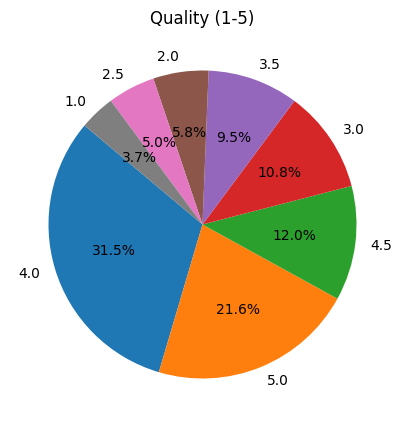

In [39]:
# Calculate the distribution of the "Quality" variable
quality_counts = df_encoded['Quality (1-5)'].value_counts()

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Quality (1-5)')
plt.show()

##**2. Bivariate Analysis**

### **a. Contionous vs Contionous**

<Axes: >

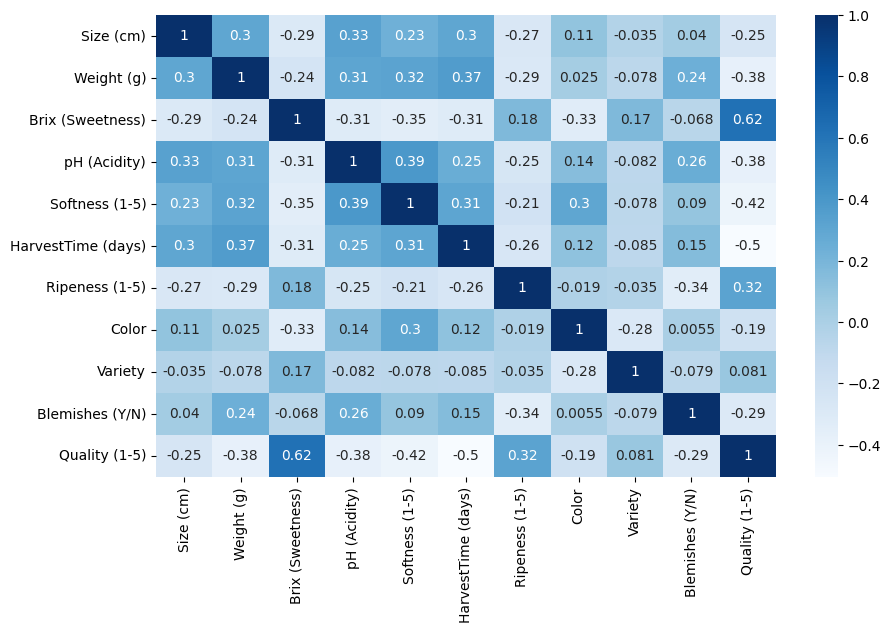

In [40]:
fig, ax = plt.subplots(figsize=(10,6)) # Sample figsize in inches, change the number accordingly
sns.heatmap(df_encoded.corr(method = 'spearman'), annot= True, cmap = 'Blues',ax = ax)

# MEDV and LSTAT is having -0.85, we might need to remove one variable

### **b. Categorical vs Categorical**

In [41]:
import pandas as pd

# Create an empty dictionary to store contingency tables
object_columns = df.select_dtypes(include=['object'])

contingency_tables = {}

# Iterate through each pair of object-type columns
for i, col1 in enumerate(object_columns):
    for j, col2 in enumerate(object_columns):
        # Skip the same column pairs and ensure the first column comes before the second column
        if i >= j:
            continue

        # Create a contingency table for the current pair of columns
        contingency_table = pd.crosstab(df[col1], df[col2])

        # Store the contingency table in the dictionary
        contingency_tables[(col1, col2)] = contingency_table

# Print or use the contingency tables as needed
for pair, table in contingency_tables.items():
    print(f"Contingency Table for columns {pair}:\n{table}\n")

In [42]:
# Chi Square Test
# So we took two categorical columns - Petal Width(Bins) and Class

# Chi Square Hypothesis :
# Null hypothesis - Petal Width (Bins) has no affect on Class
# Alternate hypothesis - Petal Width (Bins) has some affect on Class

# Chi Square Test
from scipy import stats
chi2_stat,p_val,dof,ex = stats.chi2_contingency(contingency_tables)
print("CHI-SQUARE TEST VALUES")
print("Chi Square Value : ",chi2_stat)
print("Degree of Freedom : ",dof)
print("P Value : ", p_val)
print("Contigency Table")
ex

# Inference :
# P-Value is 1.339^-22 which is quite smaller than threshold value of 5%(95% Confidence)
# This enable us to REJECT NULL HYPOTHESIS and ACCEPT ALTERNATE HYPOTHESIS
# In other word, Petal Width(Bins) has impact on Class
# And we can also say Petal Width(Bins) is a good predictor for Class

TypeError: '<' not supported between instances of 'dict' and 'int'

### **c. Categorical vs Continous**

In [ ]:
# Define an empty dictionary to store chi-square test results for each variable
chi_square_results = {}

# Loop through each column in the DataFrame
for column in df_cleanz_boxcox_minmax.columns:
    # Create a contingency table for the current variable and the target variable
    contingency_table = pd.crosstab(df_cleanz_boxcox_minmax[column], df_cleanz_boxcox_minmax['Y Indeks Distress'])

    # Perform chi-square test
    chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)

    # Store the chi-square test results in the dictionary
    chi_square_results[column] = {
        'Chi Square Value': chi2_stat,
        'Degree of Freedom': dof,
        'P Value': p_val,
        'Contingency Table': contingency_table
    }

# Print the chi-square test results for each variable
for column, result in chi_square_results.items():
    print(f"Chi Square Test Results for '{column}':")
    print("Chi Square Value:", result['Chi Square Value'])
    print("Degree of Freedom:", result['Degree of Freedom'])
    print("P Value:", result['P Value'])

 # Set the significance level
alpha = 0.05

# Loop through chi-square test results for each variable
for column, result in chi_square_results.items():
    p_val = result['P Value']

    # Determine significance based on p-value
    if p_val < alpha:
        print(f"Chi Square Test for '{column}' is significant (p-value: {p_val:.4f} < {alpha})")
    else:
        print(f"Chi Square Test for '{column}' is not significant (p-value: {p_val:.4f} >= {alpha})")

    print("\n")

In [ ]:
# Determine the number of rows and columns for subplots
n_cols = 4
n_rows = 2

# Calculate the figsize based on the number of columns
figsize = (5 * n_cols, 5 * n_rows)

In [ ]:
# Create subplots for each column
continuous_columns = ['X5 Jumlah Direktur', 'X8 Kepemilikan Keluarga', 'X9 Kepemilikan Asing',
       'X10 Kepemilikan Publik', 'X1 Komisaris Independen',
       'X3 Auditor Eksternal', 'X4 Blockholder']

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=figsize)
for i, col in enumerate(continuous_columns):
    row_index = i // n_cols
    col_index = i % n_cols
    sns.boxplot(data=df_cleanz_boxcox_minmax, x='Y Indeks Distress', y=col, ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(col)
    axes[row_index, col_index].set_xlabel('Distress')
    axes[row_index, col_index].set_ylabel(col)
plt.tight_layout()
plt.show()

membuat distribusi kategori vs numerik untuk mengetahui perbedaan karakteristik

In [ ]:
# 3) Categorical and Numerical Columns - T Test, Z Test and ANOVA

# Z Test(n > 30), T Test(n < 30) and ANNOVA
# Z Test and T Test are basically same
# They assess whether the average of two groups are statistically different from each other
# This analysis is appropiate from comparing the average of a numerical variables
# for two categories of a categorical variable

# If the probability of Z is small, difference between two average is more significant
# T Test is used when n =< 30, we use Z Test when n > 30 and n is Number of samples
# Continuous Column to do analysis - Sepal Length (cm)
# Categorical Column to do analysis - Class

# Null Hypothesis :
  # Sepal Length has NO AFFECT on Class
  # There is no statistically difference between Speal Length values for Various Class

# Alternate Hypothesis :
  # Sepal Length has SOME AFFECT on Class
  # There is difference between Observed Sepal Length values for Various Class

In [ ]:
# from statsmodels.stats.weightstats import ztest

# # Make a copy of the DataFrame to avoid modifying the original
# df_copy = df_cleanz_boxcox_minmax.copy()

# # Map values to labels
# label_map = {'Distress' : 0, 'Non Distress' : 1}
# df_copy['Y Indeks Distress'] = df_copy['Y Indeks Distress'].map(label_map)

# # Convert 'Y Indeks Distress' column to numeric and handle errors
# df_copy['Y Indeks Distress'] = pd.to_numeric(df_copy['Y Indeks Distress'], errors='coerce')

# # Convert relevant columns to numeric types
# numeric_columns = df_copy.columns.difference(['Y Indeks Distress'])
# df_copy[numeric_columns] = df_copy[numeric_columns].apply(pd.to_numeric, errors='coerce')

# # Create an empty DataFrame to store results
# ztest_results = pd.DataFrame(columns=['Column', 'Z-test statistic', 'P-value'])

# # Loop through columns (excluding 'Y Indeks Distress' column)
# for col in numeric_columns:
#     # Drop NaN values from both columns before performing z-test
#     col_values = df_copy[col].dropna()
#     distress_values = df_copy['Y Indeks Distress'].dropna()

#     # Perform z-test
#     ztest_stat, pval = ztest(col_values, distress_values, alternative='two-sided')

#     # Append results to the DataFrame
#     ztest_results = ztest_results.append({'Column': col, 'Z-test statistic': ztest_stat, 'P-value': pval}, ignore_index=True)

# # Display the results
# print(ztest_results)

In [ ]:
# ANOVA Test
# T or Z test works while dealing with two groups
# ANOVA help us to compare more than two groups at the same time
# If we use t-test then we need to carry out seperate t-test for each pair of group
# In short ANOVA help us to compare multiple group at the same time

In [ ]:
# Filter columns based on your criteria
# For example, you might want to exclude columns with too many unique values or too few unique values for meaningful tests

import scipy.stats as stats

# Identify object and float columns
numeric_columns = df_cleanz_boxcox_minmax.select_dtypes(include=['float64', 'int64']).columns

# Iterate through each pair of numeric columns
for col1 in numeric_columns:
    for col2 in numeric_columns:
        if col1 != col2:
            # Extract numeric values from the columns
            float_values = df_cleanz_boxcox_minmax[col1].dropna()
            obj_values = df_cleanz_boxcox_minmax[col2].dropna()

            # Perform t-test if both columns have values
            if len(float_values) > 0 and len(obj_values) > 0:
                # Perform t-test
                t_statistic, p_value = stats.ttest_ind(float_values, obj_values, nan_policy='omit')

                # Print results
                print(f"Test between {col1} and {col2}:")
                print(f"T-statistic: {t_statistic}")
                print(f"P-value: {p_value}")
                if p_value < 0.05:
                    print("The difference is statistically significant.\n")
                else:
                    print("The difference is not statistically significant.\n")
            else:
                print(f"Not enough data for t-test between {col1} and {col2}.\n")

## **3. Multivariate Analysis**

bisa menggunakan chisquare atau mahalanobis

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming df_cleanz is your DataFrame
# Step 2: Discretize continuous columns (if needed)
# Here, we'll discretize continuous columns into quartiles
# Discretize continuous columns into quartiles, dropping duplicate edges
df_cleanz3 = df_fix
for col in continuous_columns:
    print(f"Processing column: {col}")
    print(f"Length of {col}: {len(df_cleanz3[col])}")
    df_cleanz3[col + '_bin'] = pd.qcut(df_cleanz3[col], q=4, labels=False, duplicates='drop')

# Step 3: Perform chi-square test for each pair of variables
chi2_results = {}
for cat_col in object_columns:
    for num_col in continuous_columns:
        contingency_table = pd.crosstab(df_cleanz3[cat_col], df_cleanz3[num_col + '_bin'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        chi2_results[(cat_col, num_col)] = {'chi2': chi2, 'p-value': p}

# Print chi-square test results
for pair, result in chi2_results.items():
    cat_col, num_col = pair
    print(f"Chi-square test between '{cat_col}' and '{num_col}':")
    print(f"  Chi-square statistic: {result['chi2']}")
    print(f"  p-value: {result['p-value']}")

In [43]:
x = df_fix.drop(['Quality (1-5)'],axis=1)
y = df_fix['Quality (1-5)']

print(x.shape)
print(y.shape)

(241, 10)
(241,)


In [44]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Example continuous target variable
# Define bin edges and labels
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = [1, 2, 3, 4, 5]  # or you can use categorical labels like ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Bin continuous values into discrete categories
y_binned = pd.cut(y, bins=bins, labels=labels)

# Convert categories to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_binned)

print("Binned y:", y_binned)
print("Encoded y:", y_encoded)

Binned y: 0      4
1      4
2      5
3      3
4      4
      ..
236    5
237    4
238    5
239    2
240    4
Name: Quality (1-5), Length: 241, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]
Encoded y: [3 3 4 2 3 5 3 3 1 4 1 3 3 4 3 4 2 3 0 3 1 4 3 0 3 3 4 3 5 1 3 3 4 3 4 2 4
 1 3 3 3 4 3 4 4 4 3 3 1 4 2 4 3 0 3 3 3 4 3 4 4 1 3 4 3 4 3 2 1 4 2 4 3 3
 1 4 2 1 4 2 1 4 3 4 2 4 3 4 3 3 1 4 3 4 4 4 4 2 3 3 1 4 0 3 3 0 1 4 0 3 0
 0 4 3 1 3 1 1 0 5 0 1 4 3 3 0 1 4 1 3 0 3 4 3 1 3 1 3 3 3 3 3 3 4 2 3 2 3
 3 5 2 3 3 3 3 3 3 5 4 3 3 2 3 3 1 3 3 3 3 3 2 3 3 3 1 1 4 4 2 1 1 3 4 3 4
 1 3 3 3 4 3 2 3 4 2 2 3 3 2 5 3 3 1 1 3 0 3 4 3 3 3 3 5 3 2 3 1 3 1 2 1 4
 1 0 3 3 2 1 3 5 4 1 5 3 1 3 4 3 4 1 3]


In [45]:
import numpy as np
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot as plt
from numpy import where

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

print('Number x_train dataset:', x_train.shape)
print('Number x_test dataset:', x_test.shape)
print('Number y_train dataset:', y_train.shape)
print('Number y_test dataset:', y_test.shape)

Number x_train dataset: (192, 10)
Number x_test dataset: (49, 10)
Number y_train dataset: (192,)
Number y_test dataset: (49,)


In [47]:
print("Unique classes in y_train:", set(y_train))

Unique classes in y_train: {0, 1, 2, 3, 4, 5}


In [48]:
from collections import Counter
print("Training set class distribution:", Counter(y_train))
print("Test set class distribution:", Counter(y_test))

Training set class distribution: Counter({3: 84, 4: 42, 1: 30, 2: 18, 0: 11, 5: 7})
Test set class distribution: Counter({3: 21, 4: 10, 1: 8, 2: 5, 0: 3, 5: 2})


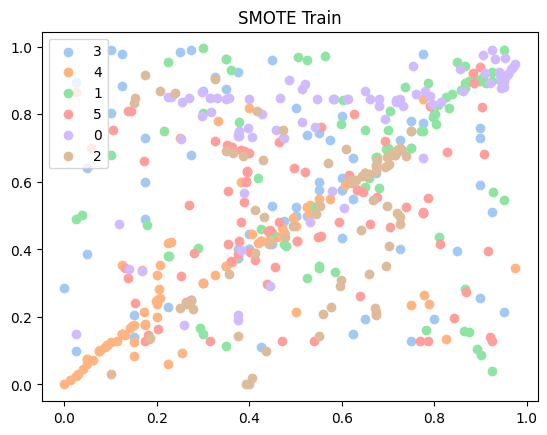

In [70]:
# Assuming x_train and y_train are your original data
sm = SMOTE(random_state=30)
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)
countertrain_smote = Counter(y_train_smote)

# Convert x_train_smote to numpy array if it's a DataFrame
if isinstance(x_train_smote, pd.DataFrame):
    x_train_smote = x_train_smote.to_numpy()

# Scatter plot of examples by class label
for label, _ in countertrain_smote.items():
    row_ix = np.where(y_train_smote == label)[0]
    plt.scatter(x_train_smote[row_ix, 0], x_train_smote[row_ix, 1], label=str(label))

plt.legend()
plt.title("SMOTE Train")
plt.show()

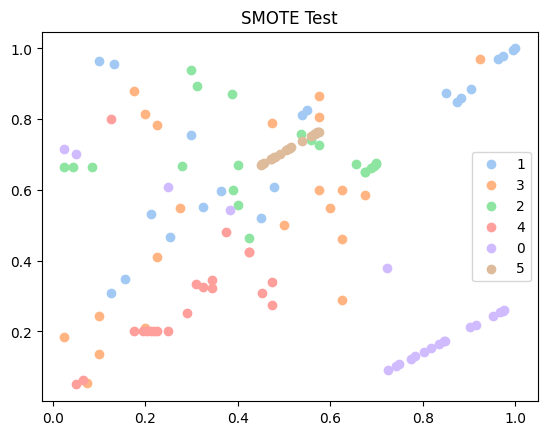

In [69]:
# Apply SMOTE with a reduced number of neighbors if necessary
sm = SMOTE(random_state=30, k_neighbors=1)  # Adjust k_neighbors based on your data size
x_test_smote, y_test_smote = sm.fit_resample(x_test, y_test)
countertest_smote = Counter(y_test_smote)

# Convert x_test_smote to numpy array if it's a DataFrame
if isinstance(x_test_smote, pd.DataFrame):
    x_test_smote = x_test_smote.to_numpy()

# Scatter plot of examples by class label
for label, _ in countertest_smote.items():
    row_ix = np.where(y_test_smote == label)[0]
    plt.scatter(x_test_smote[row_ix, 0], x_test_smote[row_ix, 1], label=str(label))

plt.legend()
plt.title("SMOTE Test")
plt.show()

5. Modeling dan Evaluasi

In [77]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, f1_score, precision_score, recall_score,
    mean_absolute_error, mean_squared_error, r2_score
)
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Create StratifiedKFold with 10 folds
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize models
models = {
    'SVM': SVC(kernel='linear', C=1, gamma=1, degree=1, probability=True),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'k-NN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Placeholder for results
results = []

# Evaluate models on training and testing data
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    model.fit(x_train_smote, y_train_smote)

    # Training data evaluation
    y_train_pred = model.predict(x_train_smote)
    acc_train = accuracy_score(y_train_smote, y_train_pred)
    conf_matrix_train = confusion_matrix(y_train_smote, y_train_pred)
    f1_train = f1_score(y_train_smote, y_train_pred, average='macro')
    precision_train = precision_score(y_train_smote, y_train_pred, average='macro')
    recall_train = recall_score(y_train_smote, y_train_pred, average='macro')
    mae_train = mean_absolute_error(y_train_smote, y_train_pred)
    mse_train = mean_squared_error(y_train_smote, y_train_pred)
    r2_train = r2_score(y_train_smote, y_train_pred)

    if hasattr(model, "predict_proba"):
        y_train_proba = model.predict_proba(x_train_smote)
        roc_auc_train = roc_auc_score(y_train_smote, y_train_proba, multi_class='ovr')
    else:
        roc_auc_train = np.nan

    # Store results for training data
    results.append({
        'Model': name,
        'Dataset': 'Training',
        'Accuracy': acc_train,
        'ROC-AUC': roc_auc_train,
        'F1 Score': f1_train,
        'Precision': precision_train,
        'Recall': recall_train,
        'MAE': mae_train,
        'MSE': mse_train,
        'R2': r2_train
    })

    # Testing data evaluation
    y_test_pred = model.predict(x_test)
    acc_test = accuracy_score(y_test, y_test_pred)
    conf_matrix_test = confusion_matrix(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred, average='macro')
    precision_test = precision_score(y_test, y_test_pred, average='macro')
    recall_test = recall_score(y_test, y_test_pred, average='macro')
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    if hasattr(model, "predict_proba"):
        y_test_proba = model.predict_proba(x_test)
        roc_auc_test = roc_auc_score(y_test, y_test_proba, multi_class='ovr')
    else:
        roc_auc_test = np.nan

    # Store results for testing data
    results.append({
        'Model': name,
        'Dataset': 'Testing',
        'Accuracy': acc_test,
        'ROC-AUC': roc_auc_test,
        'F1 Score': f1_test,
        'Precision': precision_test,
        'Recall': recall_test,
        'MAE': mae_test,
        'MSE': mse_test,
        'R2': r2_test
    })

    # Cross-Validation on training data
    y_pred_cv_train = cross_val_predict(model, x_train_smote, y_train_smote, cv=cv)
    acc_cv_train = accuracy_score(y_train_smote, y_pred_cv_train)
    conf_matrix_cv_train = confusion_matrix(y_train_smote, y_pred_cv_train)
    f1_cv_train = cross_val_score(model, x_train_smote, y_train_smote, cv=cv, scoring='f1_macro').mean()
    precision_cv_train = cross_val_score(model, x_train_smote, y_train_smote, cv=cv, scoring='precision_macro').mean()
    recall_cv_train = cross_val_score(model, x_train_smote, y_train_smote, cv=cv, scoring='recall_macro').mean()
    mae_cv_train = np.mean(cross_val_score(model, x_train_smote, y_train_smote, cv=cv, scoring='neg_mean_absolute_error'))
    mse_cv_train = np.mean(cross_val_score(model, x_train_smote, y_train_smote, cv=cv, scoring='neg_mean_squared_error'))
    r2_cv_train = np.mean(cross_val_score(model, x_train_smote, y_train_smote, cv=cv, scoring='r2'))

    if hasattr(model, "predict_proba"):
        y_proba_cv_train = cross_val_predict(model, x_train_smote, y_train_smote, cv=cv, method='predict_proba')
        roc_auc_cv_train = roc_auc_score(y_train_smote, y_proba_cv_train, multi_class='ovr')
    else:
        roc_auc_cv_train = np.nan

    # Store cross-validation results for training data
    results.append({
        'Model': name,
        'Dataset': 'CV Training',
        'Accuracy': acc_cv_train,
        'ROC-AUC': roc_auc_cv_train,
        'F1 Score': f1_cv_train,
        'Precision': precision_cv_train,
        'Recall': recall_cv_train,
        'MAE': mae_cv_train,
        'MSE': mse_cv_train,
        'R2': r2_cv_train
    })

    # Cross-Validation on testing data
    y_pred_cv_test = cross_val_predict(model, x_test_smote, y_test_smote, cv=cv)
    acc_cv_test = accuracy_score(y_test_smote, y_pred_cv_test)
    conf_matrix_cv_test = confusion_matrix(y_test_smote, y_pred_cv_test)
    f1_cv_test = cross_val_score(model, x_test_smote, y_test_smote, cv=cv, scoring='f1_macro').mean()
    precision_cv_test = cross_val_score(model, x_test_smote, y_test_smote, cv=cv, scoring='precision_macro').mean()
    recall_cv_test = cross_val_score(model, x_test_smote, y_test_smote, cv=cv, scoring='recall_macro').mean()
    mae_cv_test = np.mean(cross_val_score(model, x_test_smote, y_test_smote, cv=cv, scoring='neg_mean_absolute_error'))
    mse_cv_test = np.mean(cross_val_score(model, x_test_smote, y_test_smote, cv=cv, scoring='neg_mean_squared_error'))
    r2_cv_test = np.mean(cross_val_score(model, x_test_smote, y_test_smote, cv=cv, scoring='r2'))

    if hasattr(model, "predict_proba"):
        y_proba_cv_test = cross_val_predict(model, x_test_smote, y_test_smote, cv=cv, method='predict_proba')
        roc_auc_cv_test = roc_auc_score(y_test_smote, y_proba_cv_test, multi_class='ovr')
    else:
        roc_auc_cv_test = np.nan

    # Store cross-validation results for testing data
    results.append({
        'Model': name,
        'Dataset': 'CV Testing',
        'Accuracy': acc_cv_test,
        'ROC-AUC': roc_auc_cv_test,
        'F1 Score': f1_cv_test,
        'Precision': precision_cv_test,
        'Recall': recall_cv_test,
        'MAE': mae_cv_test,
        'MSE': mse_cv_test,
        'R2': r2_cv_test
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

print("\nEvaluation Results DataFrame:")
results_df


Evaluating SVM...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Evaluating Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classific


Evaluating Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Evaluating Gradient Boosting...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me


Evaluating Decision Tree...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_c


Evaluating k-NN...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_class


Evaluating Naive Bayes...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: U


Evaluating AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classific


Evaluating Extra Trees...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Evaluating XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:15:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:15:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:15:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:15:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:15:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


Evaluation Results DataFrame:


,Model,Dataset,Accuracy,ROC-AUC,F1 Score,Precision,Recall,MAE,MSE,R2
0,SVM,Training,0.759921,0.956807,0.756885,0.758875,0.759921,0.500000,1.519841,0.478912
1,SVM,Testing,0.469388,0.785049,0.396268,0.383709,0.455159,0.816327,1.632653,-0.041999
2,SVM,CV Training,0.712302,0.939026,0.692808,0.704344,0.712548,-0.642235,-2.045686,0.265965
3,SVM,CV Testing,0.888889,0.975737,0.876432,0.878611,0.894333,-0.157051,-0.251923,0.890805
4,Logistic Regression,Training,0.712302,0.931600,0.708466,0.708622,0.712302,0.686508,2.361111,0.190476
5,Logistic Regression,Testing,0.469388,0.775484,0.374086,0.377289,0.387302,0.836735,1.734694,-0.107124
6,Logistic Regression,CV Training,0.662698,0.912902,0.637946,0.659438,0.663641,-0.780863,-2.628000,0.064662
7,Logistic Regression,CV Testing,0.825397,0.961754,0.760942,0.766611,0.795722,-0.280769,-0.591026,0.737810
8,Random Forest,Training,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
9,Random Forest,Testing,0.591837,0.865650,0.535290,0.602778,0.507540,0.571429,1.142857,0.270601


In [82]:
from sklearn.model_selection import cross_val_score

# Initialize the Extra Trees model
model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, x_train_smote, y_train_smote, cv=cv, scoring='accuracy')

print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean()}")

# Fit the model on the entire dataset
model.fit(x_train_smote, y_train_smote)

# Save the model
joblib.dump(model, 'extra_trees_model.pkl')

print("Model saved as extra_trees_model.pkl")

Cross-validation scores: [0.94117647 0.90196078 0.92156863 0.92156863 0.94       0.92
 0.92       1.         0.94       0.9       ]
Mean accuracy: 0.9306274509803922
Model saved as extra_trees_model.pkl


In [59]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

# Create StratifiedKFold with 10 folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize SVM model with linear kernel and specified parameters
linear = SVC(kernel='linear', C=1, gamma=1, degree=1, probability=True)

# Perform cross-validated predictions
y_pred_cv = cross_val_predict(linear, x_smote, y_smote, cv=cv)

# Evaluate the model
linear_acc_cv = accuracy_score(y_smote, y_pred_cv)
conf_matrix_cv = confusion_matrix(y_smote, y_pred_cv)
cv_ra = cross_val_score(linear, x_smote, y_smote, cv=cv, scoring='roc_auc')
cv_acc = cross_val_score(linear, x_smote, y_smote, cv=cv, scoring='accuracy')
cv_f1 = cross_val_score(linear, x_smote, y_smote, cv=cv, scoring='f1')

# Print cross-validation scores
print(classification_report(y_smote, y_pred_cv))
print("Confusion Matrix (Cross-Validation):\n", conf_matrix_cv)
print("Accuracy SVM (Cross-Validation): {:.2f}%".format(linear_acc_cv * 100))
print("ROC-AUC CV Scores: {:.2f}%".format(np.mean(cv_ra) * 100))
print("F1 Scores CV Scores: {:.2f}%".format(np.mean(cv_f1) * 100))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-pack

              precision    recall  f1-score   support

           0       0.71      0.70      0.71        84
           1       0.54      0.51      0.52        84
           2       0.74      0.75      0.75        84
           3       0.73      0.58      0.65        84
           4       0.86      0.87      0.86        84
           5       0.73      0.90      0.81        84

    accuracy                           0.72       504
   macro avg       0.72      0.72      0.72       504
weighted avg       0.72      0.72      0.72       504

Confusion Matrix (Cross-Validation):
 [[59 13  1  0  0 11]
 [10 43 13  7  5  6]
 [ 3  8 63  2  0  8]
 [ 3 16  6 49  7  3]
 [ 0  0  2  9 73  0]
 [ 8  0  0  0  0 76]]
Accuracy SVM (Cross-Validation): 72.02%
ROC-AUC CV Scores: nan%
F1 Scores CV Scores: nan%


In [60]:
# Latih model pada data latih
linear.fit(x_bss, y_bss)

y_pred = linear.predict(x_test)
linear_acc =accuracy_score(y_pred,y_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print(classification_report(y_test,y_pred))
print("Confusion Matrix:\n", conf_matrix)
print("Akurasi SVM : {:.2f}%".format(linear_acc*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.38      0.38      0.38         8
           2       0.50      0.80      0.62         5
           3       0.78      0.67      0.72        21
           4       0.67      0.80      0.73        10
           5       1.00      0.50      0.67         2

    accuracy                           0.61        49
   macro avg       0.55      0.52      0.52        49
weighted avg       0.62      0.61      0.61        49

Confusion Matrix:
 [[ 0  2  1  0  0  0]
 [ 2  3  2  1  0  0]
 [ 0  0  4  1  0  0]
 [ 0  2  1 14  4  0]
 [ 0  0  0  2  8  0]
 [ 0  1  0  0  0  1]]
Akurasi SVM : 61.22%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [61]:
from sklearn.metrics import precision_recall_curve

#use logistic regression model to make predictions
y_score = linear.predict_proba(x_test)[:, 1]

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


ValueError: multiclass format is not supported

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Assuming linear is your trained SVM model and x_test, y_test are your test data
# Make sure the SVM model is trained on binary classification task (2 classes)

# Get predicted probabilities for the positive class (class 1)
y_pred_proba = linear.decision_function(x_test)

# Compute AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC Score:", auc_roc)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')

# Plot random guessing point
plt.scatter(0.5, 0.5, color='red', label='Random Guessing Point (0.5, 0.5)')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Choose a specific row for which you want to identify support vectors
specific_row_index = 36  # Replace with the index of your specific row

# Get the specific row data
specific_row_data = x_bss[specific_row_index].reshape(1, -1)

# Use decision_function to get the signed distance of each sample to the hyperplane
decision_values = linear.decision_function(specific_row_data)

# Get the indices of the support vectors (samples with non-zero decision values)
support_vector_indices = np.where(np.abs(decision_values) == np.min(np.abs(decision_values)))

# Print the indices of support vectors for the specific row
print("Support vector indices for the specific row:", support_vector_indices)

# Retrieve the actual support vectors
support_vectors = x_bss[support_vector_indices]

# Create a scatter plot
plt.scatter(x_bss[:, 0], x_bss[:, 1], c=y_bss, cmap='viridis', marker='o', label='Training Data')

# Highlight support vectors
plt.scatter(x_bss[support_vector_indices, 0], x_bss[support_vector_indices, 1], c='red', marker='x', label='Support Vectors')

# Highlight the specific row
plt.scatter(specific_row_data[:, 0], specific_row_data[:, 1], c='blue', marker='*', s=200, label='Specific Row')

# Set plot labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Support Vector Machine - Support Vectors')
plt.legend()

# Show the plot
plt.show()

In [ ]:
print('w = ',linear.coef_)
print('b = ',linear.intercept_)
print('Indices of support vectors = ', linear.support_)
print('Support vectors = ', linear.support_vectors_)
print('Number of support vectors for each class = ', linear.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(linear.dual_coef_))

## Linearitas

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'X_train' contains independent variables and 'y_train' is the target variable
# Plotting individual independent variables against the target variable
for column in X_train.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_train[column], y=y_train)
    plt.xlabel(column)
    plt.ylabel('Target Variable')
    plt.title(f"Relationship between {column} and Target Variable")
    plt.show()


## Homoskedasitas

In [ ]:
# Assuming 'model' is the trained regression model and 'X_train' is the training data
predictions = model.predict(X_train)
residuals = y_train - predictions

plt.figure(figsize=(6, 4))
sns.scatterplot(x=predictions, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.axhline(y=0, color='red', linestyle='--')  # Adding horizontal line at 0 (for homoskedasticity)
plt.show()

## Autokorelasi

In [ ]:
import statsmodels.api as sm

# Assuming 'model' is the trained regression model and 'X_train' is the training data
predictions = model.predict(X_train)
residuals = y_train - predictions

# Perform Durbin-Watson test
durbin_watson = sm.stats.stattools.durbin_watson(residuals)
print(f"Durbin-Watson statistic: {durbin_watson}")

# Interpretation of Durbin-Watson statistic:
# - Close to 2: No significant autocorrelation
# - < 1 or > 3: Suggests presence of autocorrelation
# - Values between 1 and 3: Inconclusive

## Multikoliniearitas

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
print(vif_data)

Maka menggunakan PooledOLS

# **Modeling**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Initialize and train the model (Logistic Regression in this case)
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict using the trained model
predictions = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, model.predict(X_test)))

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC(kernel='linear')  # You can choose different kernels like 'rbf'
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, svm_model.predict(X_test)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)  # You can adjust hyperparameters
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, rf_model.predict(X_test)))